# test-4

From big test comaprison table with 10 plots

LogCircular 1:100 - point GO

19 dic 2024

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def make_plots(file_name,reference_file_name=None):
  data = pd.read_csv(file_name)
  pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
  print(data)

  if reference_file_name is not None:
    reference_data = pd.read_csv(reference_file_name)

  plt.figure(figsize=(13, 6))  # Adjust the figure size for two plots

  plt.subplot(1, 2, 1)  # Second subplot (bottom)
  plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=1.0, label='Exact Error')
  plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='Estimated Error')
  if reference_file_name is not None:
    plt.loglog(reference_data['DoFs'], reference_data['ex POINT err'],"b:+", linewidth=0.5, label='GlobRef exact error (Reference)')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.ylabel('Error', fontsize=12)
  plt.title('Exact vs Estimated POINT error', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  plt.subplot(1, 2, 2)  # First subplot (top)
  plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
  plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"y-+", linewidth=0.5, label='Error in [computed value + estimated error]')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.title('Exact error and residual', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  # Adjust layout and show the plots
  plt.tight_layout()
  plt.show()

### config-2

Original tests from 19th Dec 2024 \
Mesh A, stupidly fine \
non-iso \
Manifold only on boundary

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0   5760   5820 2.5429110493e+01 1.6302386256e+00 2.2218827840e+03   
1      1   6519   6669 6.7319452406e+00 4.5706828543e-01 1.3529649194e+03   
2      2  10905  11321 1.5282045391e-01 2.4050830181e-01 8.6109998393e+02   
3      3  24633  25593 2.1262892125e-01 2.1932574560e-01 5.7090446950e+02   
4      4  61929  64190 5.2415192850e-02 7.7375375004e-02 3.8846498125e+02   

      std FLUX err          est err   Cons. FLUX err  
0 8.9738275715e+03 2.8746615237e+01 2.4702580900e+02  
1 5.4055641039e+03 1.0213675862e+01 9.5621130000e+01  
2 3.0080408812e+03 3.5768389878e+00 4.2181305000e+01  
3 1.5937872376e+03 1.0938107369e+00 1.9760455000e+01  
4 8.2225772129e+02 5.0920393209e-01 8.6512310000e+00  


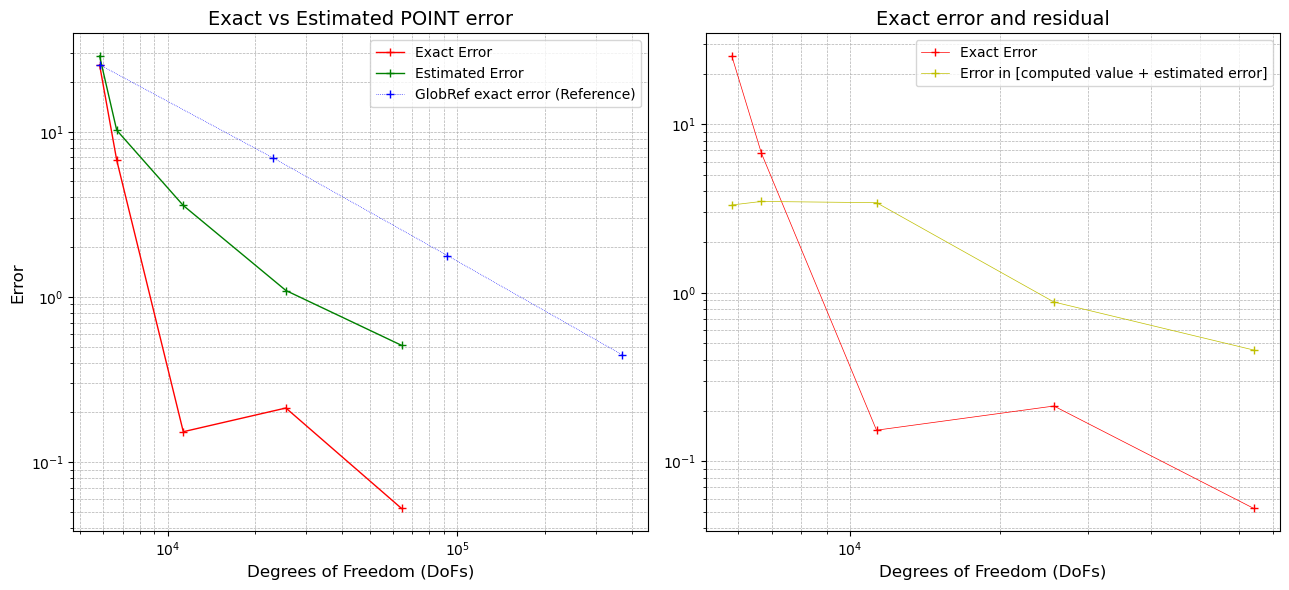

In [3]:
make_plots("./results/config-2/convergence_results.csv","./results/config-1/convergence_results.csv")

### config-4

Mesh B, coarser to begin with

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0    252    270 5.1270882559e+01 1.8582515005e+00 3.2709390661e+03   
1      1    624    690 1.8344670095e+01 1.4787493603e+00 2.5880174094e+03   
2      2   1332   1430 7.6646956461e+00 4.5330664008e-01 1.5877484178e+03   
3      3   3711   3909 1.9721387405e+00 6.1508007667e-01 1.1547453785e+03   
4      4   9468  10272 1.5396025452e+00 1.6152207690e-01 7.5749807712e+02   
5      5  20352  21088 3.8992068862e-01 5.3999066876e-02 4.4099220333e+02   
6      6  54321  56597 1.3823799330e-01 2.9586481576e-02 2.9742646121e+02   

      std FLUX err          est err   Cons. FLUX err  
0 5.1413214345e+03 4.8032398503e+01 5.3501173600e+02  
1 2.7322763338e+03 2.6216491495e+01 3.4503708200e+02  
2 2.9302718055e+03 1.1635450329e+01 1.2230722700e+02  
3 1.5317039231e+03 4.0106741046e+00 6.6699524000e+01  
4 7.8900926813e+02 2.3315252877e+00 2.9579423000e+01  
5 8.0838124844e+02 7.8034919834e-01 9.6136980000e+00 

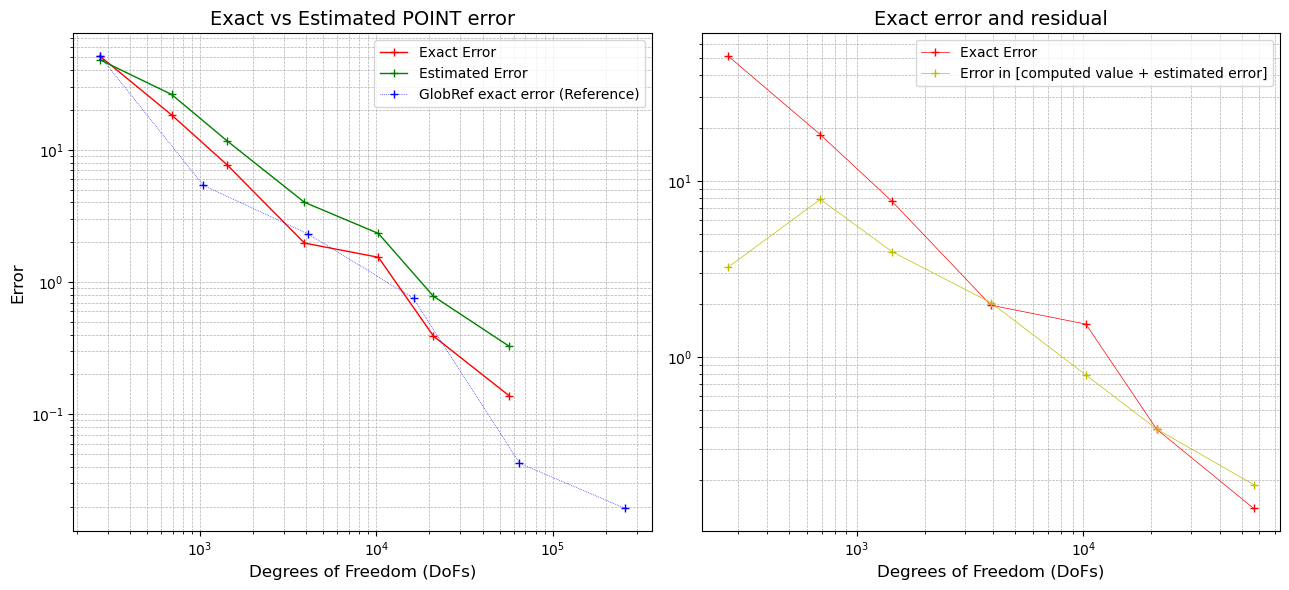

In [4]:
make_plots("./results/config-4/convergence_results.csv","./results/config-3/convergence_results.csv")

### config-6

iso \
all manifold \
mesh B (of course)

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0    252    270 5.2599015999e+01 2.9113970145e+00 2.2465357781e+03   
1      1    582    644 2.2090885418e+01 1.9134333031e+00 1.8468509310e+03   
2      2   1188   1255 1.1497437584e+01 9.9433328593e-01 1.3875997875e+03   
3      3   3297   3606 4.9880864590e+00 4.4391240165e-01 9.9750365288e+02   
4      4   8172   8910 2.0297788801e+00 1.9502050356e-01 6.8958353974e+02   
5      5  19221  19808 7.3400325021e-01 7.6234392834e-02 4.2375083360e+02   
6      6  53637  56223 3.1489082408e-01 3.1165977569e-02 2.8153341759e+02   

      std FLUX err          est err   Cons. FLUX err  
0 5.3660375102e+03 3.6515551058e+00 2.5239000000e+02  
1 2.9394951507e+03 1.8522510338e+01 1.7057675200e+02  
2 3.0053670513e+03 9.2696911573e+00 9.6300120000e+01  
3 1.5796014833e+03 4.2284222899e+00 4.9796946000e+01  
4 1.1611427667e+03 1.9910463899e+00 1.5825418000e+01  
5 8.2668002165e+02 7.1533968845e-01 9.0052940000e+00 

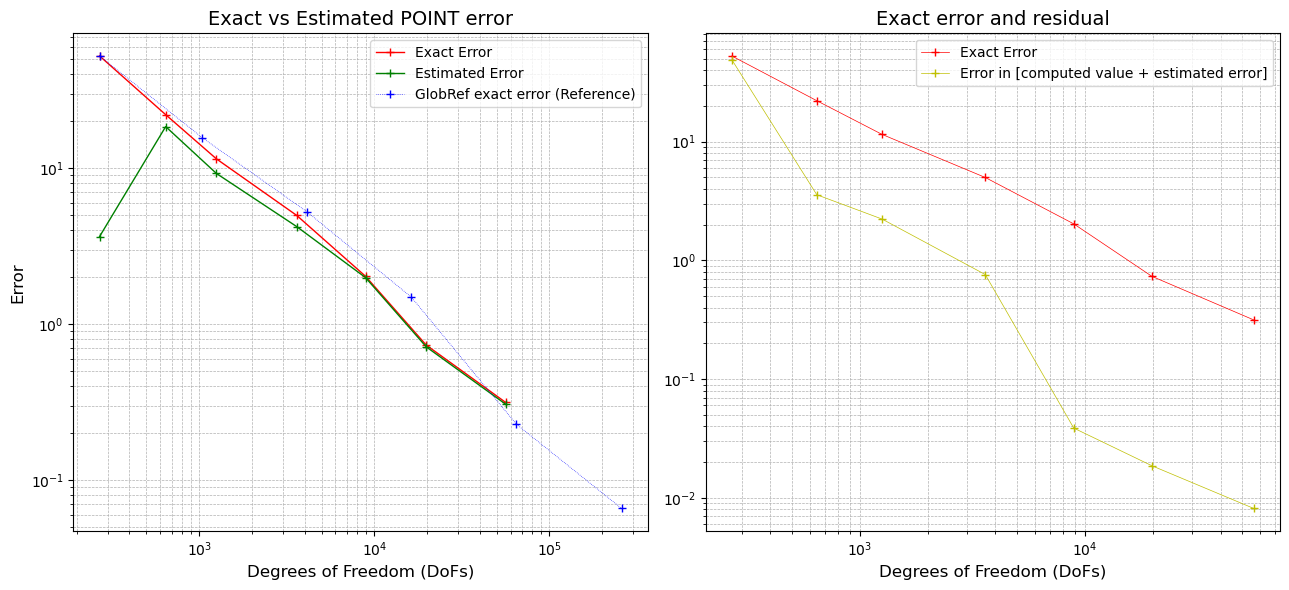

In [5]:
make_plots("./results/config-6/convergence_results.csv","./results/config-5/convergence_results.csv")

# note: even globref struggles quite a bit